<a href="https://colab.research.google.com/github/TenKim0503/Financial_Engineering/blob/main/2nd_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
r = 0.00
sig = 0.2
T = 30/365

M = 100
N = 1000

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt) 

In [ ]:
S0 = 100
np.random.seed(100)
S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

In [ ]:
# for i in range(M):
#     S[i,0] = S0
#     for j in range(N):
#         S[i,j+1] = S[i,j] * (1+np.random.normal(r*dt,sigsdt))


In [ ]:
for i in range(M):
    S[i,0] = S0
    for j in range(N):
        S[i,j+1] = S[i,j] * (1+rv[i,j])

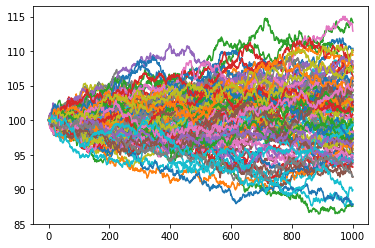

In [ ]:
for i in range(M):
    plt.plot(S[i,:])

plt.show()

In [ ]:
m = 0

for j in range(N):
  print(S[m,j])

100.0
99.68273363453879
99.74467109569565
99.95320500557058
99.90745488237339
100.08522267707205
100.17853997093331
100.21871573018312
100.02427180102146
99.98990419758731
100.03613622971514
99.9530570564562
100.03192358438235
99.92607271950499
100.07407341846873
100.19614108092519
100.17717218568455
100.08067009233297
100.26753118901685
100.18787618248383
99.98472246586239
100.27823034581866
100.55853093546655
100.51260528550748
100.3590723677881
100.39264931386268
100.56322761901507
100.69651866492283
100.94511469856646
100.88540235432457
100.8955868766197
100.93627338114038
100.67214012114361
100.53407701911418
100.68290658427355
100.8199059844631
100.7365561441055
100.95384646206169
100.64438095576514
100.39685474113257
100.17250366852184
100.07361601406554
99.95237435103496
99.95369999135339
99.8426137854539
100.07791237046334
99.76342373672686
99.58555237270285
99.65010679397878
99.3585574567144
99.62351583412783
99.40891622389195
99.30982578298564
99.1405536014812
98.99172363284

In [ ]:
m = 1
K = 100
hedge = 0 #주식을 안갖고 있음
cost = 0

for j in range(N):
  d1 = (np.log(S[m,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
  delta = norm.cdf(d1)
  cost = cost + (hedge-delta) * S[m,j]
  
  print(S[m,j], delta, delta-hedge, cost)

  hedge = delta
  #Delta position을 유지하여 Hedging을 성공시킴

100.0 0.5114357531402248 0.5114357531402248 -51.143575314022485
99.96176566515936 0.5087688219636368 -0.0026669311765880055 -50.87698416470329
99.83907476474248 0.5002089356291093 -0.008559886334527533 -50.022373032972695
99.8635348083793 0.501904532502718 0.0016955968736087623 -50.1917013303813
99.83379319485012 0.49981740842843325 -0.0020871240742847963 -49.98333581717716
100.03286240583904 0.513697827707429 0.013880419278995748 -51.3718338890483
99.92662210543479 0.5062800156902476 -0.007417812017181391 -50.63059699075826
100.11372483621636 0.5193256190714429 0.013045603381195314 -51.93664093798566
99.97089606576054 0.5093572104761251 -0.00996840859531778 -50.94009019836211
100.26413864188054 0.5297948891912752 0.02043767871515001 -52.98925645057612
100.58535110480095 0.5520443148526537 0.022249425661378552 -55.22722274260605
100.59022327403336 0.5523950383133561 0.0003507234607024179 -55.26250209382555
100.46366768493696 0.5436618884542123 -0.008733149859143863 -54.38513782853377
1

In [ ]:
from scipy.stats import norm

In [ ]:
M = 64
K = 100

hedge = 0
cost = 0
for j in range(N):
    d1 = (np.log(S[M,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
    delta = norm.cdf(d1)
    cost = cost + (hedge-delta) * S[M,j]
    hedge = delta
    print(S[M,j], delta, cost)

if S[M,N] > K: #주식을 더 갖자 상대방이 계약을 행사할 것임
    delta = 1
    cost = cost + K
else:
    delta = 0 #주식 청산, 상대방이 계약을 행사하지 않을 것임
    cost = cost + S[M,N] * hedge
   
print(S[M,N], 0, cost)

100.0 0.5114357531402248 -51.143575314022485
100.23888725089007 0.5280180777321252 -52.805769079147645
100.27035219027944 0.5302007068480427 -53.02462206930145
99.94807502340345 0.5078004970589286 -50.785764220759106
99.855287516025 0.5013182502514526 -50.13847760204875
99.76365285255659 0.4949037190354978 -49.498540536608346
99.55995394470011 0.48063343888159304 -48.07779210170762
99.88807517555843 0.5035779977133112 -50.36967991916031
99.86442635467323 0.5019142749732307 -50.20353320210894
100.26423219456537 0.5298013923708378 -52.99961361609972
100.34990305175671 0.5357571323554284 -53.597271546154865
100.31037483705417 0.5330175477146701 -53.32246278394256
100.41935361405055 0.5405908560047776 -54.082969507155084
100.42815390488907 0.5412103773343895 -54.145186890592704
100.51885699061752 0.5475060657614002 -54.778022295244874
100.7340523488681 0.5623676162045326 -56.27508649556872
100.94784313229121 0.5770294883205227 -57.75517086195941
100.78352111121175 0.5658085101218585 -56.62

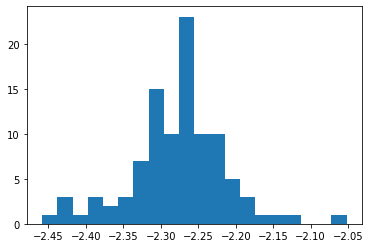

In [ ]:
M = 100
a = []

K = 100

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)  
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    if S[i,N] > K:
        cost = cost + (hedge-1)*S[i,N] + K
        #print(hedge)
    else:
        cost = cost + (hedge-0)*S[i,N]
        #print(hedge)
        

    a.append(cost)

plt.hist(a, bins=20)
plt.show()

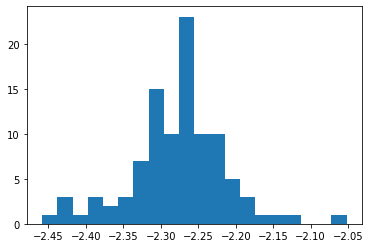

In [ ]:
plt.hist(a, bins=20)
plt.show()

In [ ]:
d1 = (np.log(S0/K)+(r+0.5*sig**2)*(T))/(sig*np.sqrt(T))
d2 = (np.log(S0/K)+(r-0.5*sig**2)*(T))/(sig*np.sqrt(T))

S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

2.2871506280449694

In [ ]:
a = []

K = 103

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge*S[i,N]
        

    a.append(cost)

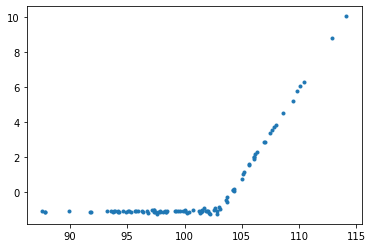

In [ ]:
plt.plot(S[:,-1], a, marker=".", linestyle='none')

In [ ]:
a = []

K_1 = 95
K_2 = 100
K_3 = 110

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1_1 = (np.log(S[i,j]/K_1)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_1 = norm.cdf(d1_1)  
        d1_2 = (np.log(S[i,j]/K_2)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_2 = norm.cdf(d1_2)  
        d1_3 = (np.log(S[i,j]/K_3)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_3 = norm.cdf(d1_3)  
        delta = delta_1 - 2*delta_2 + delta_3
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    
    cost = cost + hedge*S[i,N]
        

    a.append(cost)

In [ ]:
len(a)

100

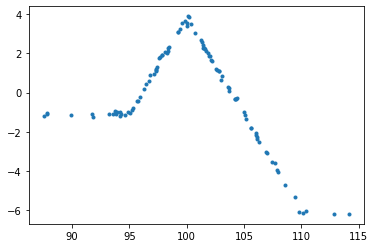

In [ ]:
plt.plot(S[:,-1], a, marker=".", linestyle='none')

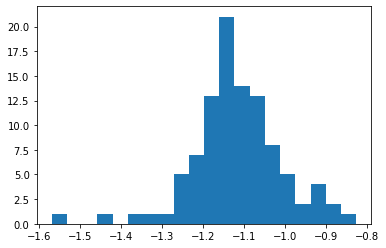

In [ ]:
a = []

K_1 = 95
K_2 = 100
K_3 = 110

for i in range(M):
    cost = 0
    hedge = 0
    for j in range(N):
        d1_1 = (np.log(S[i,j]/K_1)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_1 = norm.cdf(d1_1)  
        d1_2 = (np.log(S[i,j]/K_2)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_2 = norm.cdf(d1_2)  
        d1_3 = (np.log(S[i,j]/K_3)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta_3 = norm.cdf(d1_3)  
        delta = delta_1 - 2*delta_2 + delta_3
        cost = cost + (hedge-delta) * S[i,j]
        hedge = delta
    

    cost = cost + hedge * S[i,N] + (- np.maximum(S[i,N]-K_1,0) + 2* np.maximum(S[i,N]-K_2,0) - np.maximum(S[i,N]-K_3,0))

        

    a.append(cost)

plt.hist(a, bins=20)
plt.show()